In [ ]:
%cd /content/drive/MyDrive/02- Intro to AI project/TwiBot-20/Twibot-20

/content/drive/.shortcut-targets-by-id/1b0aOZUUZU-pUB5eS1R6Z500OSwpJu5xX/02- Intro to AI project/TwiBot-20/Twibot-20


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
data = pd.read_csv('clean_train.csv')

<ipython-input-3-6d0104a409ab>:1: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clean_train.csv')


In [ ]:
data = data[['cleaned_tweets', 'label']].values

In [ ]:
test_data = pd.read_csv('clean_test.csv')
test_data = test_data[['cleaned_tweets', 'label']].values

<ipython-input-5-153cf8eb16ec>:1: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('clean_test.csv')


In [ ]:
X_train, y_train = data[:,0], data[:,1]
X_test, y_test = test_data[:,0], test_data[:,1]

X_train = X_train.astype('str')
X_test = X_test.astype('str')

In [ ]:
y_train, y_test = y_train.astype('bool'), y_test.astype('bool')

In [ ]:
data, test_data = None, None

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

In [ ]:
embeddings_dict = {}
with open('glove.twitter.27B.25d.txt', encoding='utf8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dict[word] = coefs

In [ ]:
embedding_matrix = np.zeros((5000, 25))
for word, index in tokenizer.word_index.items():
  if index > 5000 - 1:
    break
  else:
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(5000, 25, 
          weights=[embedding_matrix], 
          input_length=max_length,
          trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_pad, y_train, 
          validation_data=(X_test_pad, y_test),
          epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test_pad, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
39078/39078 [==============================] - 148s 4ms/step - loss: 0.6516 - accuracy: 0.6259 - val_loss: 0.6573 - val_accuracy: 0.6059
Epoch 2/10
39078/39078 [==============================] - 147s 4ms/step - loss: 0.6496 - accuracy: 0.6269 - val_loss: 0.6581 - val_accuracy: 0.5995
Epoch 3/10
39078/39078 [==============================] - 147s 4ms/step - loss: 0.6488 - accuracy: 0.6270 - val_loss: 0.6582 - val_accuracy: 0.5998
Epoch 4/10
39078/39078 [==============================] - 147s 4ms/step - loss: 0.6481 - accuracy: 0.6274 - val_loss: 0.6567 - val_accuracy: 0.6067
Epoch 5/10
39078/39078 [==============================] - 146s 4ms/step - loss: 0.6477 - accuracy: 0.6281 - val_loss: 0.6599 - val_accuracy: 0.5991
Epoch 6/10
39078/39078 [==============================] - 145s 4ms/step - loss: 0.6470 - accuracy: 0.6283 - val_loss: 0.6578 - val_accuracy: 0.6068
Epoch 7/10
39078/39078 [==============================] - 146s 4ms/step - loss: 0.6467 - accuracy: 0.6286 - val_

5570/5570 [==============================] - 11s 2ms/step
              precision    recall  f1-score   support

       False       0.64      0.26      0.37     78694
        True       0.60      0.88      0.72     99530

    accuracy                           0.61    178224
   macro avg       0.62      0.57      0.54    178224
weighted avg       0.62      0.61      0.56    178224



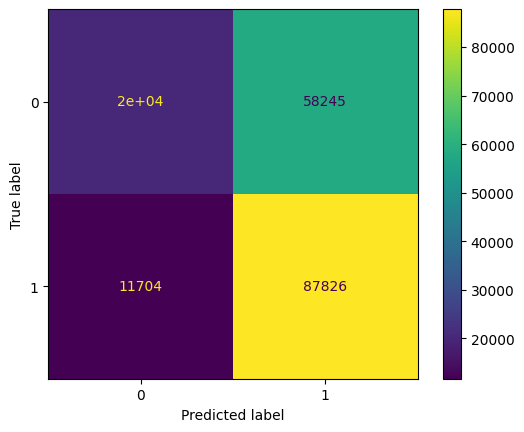

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test_pad)
y_pred_cutoff = np.array([True if pred > 0.5 else False for pred in y_pred])
print(classification_report(y_test, y_pred_cutoff))
cm = confusion_matrix(y_test, y_pred_cutoff)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

Text(0.5, 1.0, 'ROC Curve')

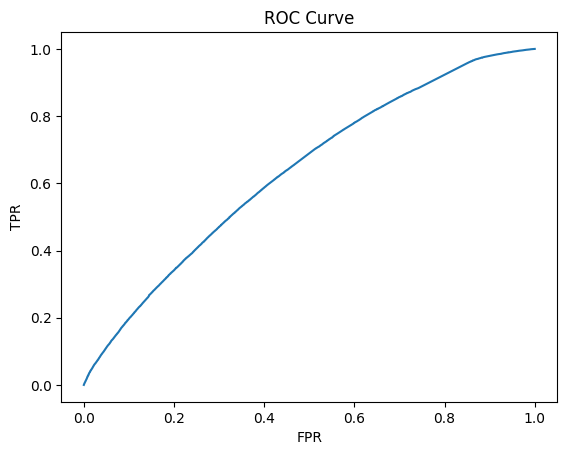

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.title("ROC Curve")